In [24]:
df=pd.read_csv("/kaggle/working/killme2_dataframe.csv")
df

,Skin_Symptoms,Gastrointestinal_Symptoms,Respiratory_Symptoms,Neurological_Symptoms,Fever_Infection_Symptoms,Musculoskeletal_Symptoms,Urinary_Symptoms,Metabolic_Endocrine,General_Symptoms,Disease
0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,0,0,0,0,0,0,0,0,Psoriasis


In [23]:
#works only on numrical kind of sueless here
from scipy import stats
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/disease-symptom-description-dataset/dataset.csv")

# Calculate Z-scores for numerical columns
numerical_cols = df.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(numerical_cols))

# Identify outliers (where any column has Z-score > 2)
outliers = (z_scores > 3).any(axis=1)

# Print number of outliers
print(f"Number of outliers: {outliers.sum()}")

# Remove outliers by keeping only the non-outliers
df_clean = df[~outliers]

# Print the shape of the original and cleaned DataFrame
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Number of outliers: 0
Original shape: (4920, 18)
Cleaned shape: (4920, 18)


In [24]:
#testing association the lower the number the higher the corrlation
from scipy.stats import chi2_contingency

# Example: Test association between 'symptom' and 'disease'
df = pd.read_csv("/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv")

# Get column names as a list (array)
#below is to calculate all the chai association between all the features this works great for binary features aka yes or no and yes i made this myself <<:(
columns_array = df.columns.tolist()
for first in columns_array:
    for second in columns_array:
        contingency_table = pd.crosstab(df[first], df[second])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"chi association for: {first} / {second} | Chi2: {chi2:.2f} | p-value: {p:.4f}")

chi association for: Disease / Disease | Chi2: 40135.00 | p-value: 0.0000
chi association for: Disease / Fever | Chi2: 134.00 | p-value: 0.1088
chi association for: Disease / Cough | Chi2: 122.99 | p-value: 0.2881
chi association for: Disease / Fatigue | Chi2: 113.92 | p-value: 0.5108
chi association for: Disease / Difficulty Breathing | Chi2: 222.63 | p-value: 0.0000
chi association for: Disease / Age | Chi2: 2356.54 | p-value: 1.0000
chi association for: Disease / Gender | Chi2: 110.25 | p-value: 0.6078
chi association for: Disease / Blood Pressure | Chi2: 163.59 | p-value: 0.9997
chi association for: Disease / Cholesterol Level | Chi2: 229.43 | p-value: 0.4983
chi association for: Disease / Outcome Variable | Chi2: 124.44 | p-value: 0.2579
chi association for: Fever / Disease | Chi2: 134.00 | p-value: 0.1088
chi association for: Fever / Fever | Chi2: 345.01 | p-value: 0.0000
chi association for: Fever / Cough | Chi2: 5.32 | p-value: 0.0211
chi association for: Fever / Fatigue | Chi2

In [31]:
print(set(df["Disease"]))
print(len(set(df["Disease"])))
columns_array = df.columns.tolist()
print(columns_array)

{'Chronic cholestasis', 'Gastroenteritis', 'Malaria', 'Arthritis', 'Osteoarthristis', 'Varicose veins', 'Impetigo', 'GERD', 'Paralysis (brain hemorrhage)', 'AIDS', 'Hyperthyroidism', 'Hypertension ', '(vertigo) Paroymsal  Positional Vertigo', 'Pneumonia', 'Fungal infection', 'Hepatitis D', 'Hepatitis C', 'Common Cold', 'Dimorphic hemmorhoids(piles)', 'Hypoglycemia', 'Typhoid', 'Urinary tract infection', 'Dengue', 'Psoriasis', 'Hepatitis E', 'Diabetes ', 'Heart attack', 'hepatitis A', 'Acne', 'Bronchial Asthma', 'Migraine', 'Tuberculosis', 'Drug Reaction', 'Chicken pox', 'Hepatitis B', 'Hypothyroidism', 'Allergy', 'Cervical spondylosis', 'Jaundice', 'Peptic ulcer diseae', 'Alcoholic hepatitis'}
41
['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [26]:
#clean the data
import pandas as pd
import numpy as np

# Load your dataset (replace 'data.csv' with your file)
df = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/dataset.csv')

# Replace NaN/NaNs with 0 (for all columns)
df = df.fillna(0)

# Alternative: Replace NaN only in specific columns (e.g., numeric columns)
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Replace 'inf' or '-inf' with 0
df = df.replace([np.inf, -np.inf], 0)

# Drop duplicate rows (keeping the first occurrence)
df = df.drop_duplicates()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Convert columns to proper data types (e.g., 'Age' to integer)
#df['Age'] = df['Age'].astype(int)  # Example for a specific column

In [27]:
#replace nans in disease with unkown
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [28]:
#save dataset
df.to_csv('cleaned_data.csv', index=False)  # Save cleaned dataset

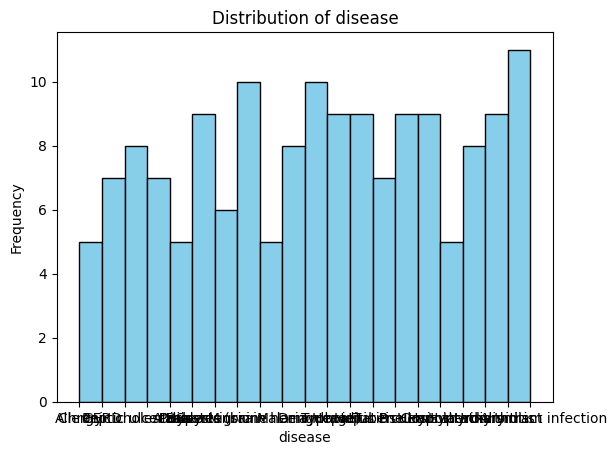

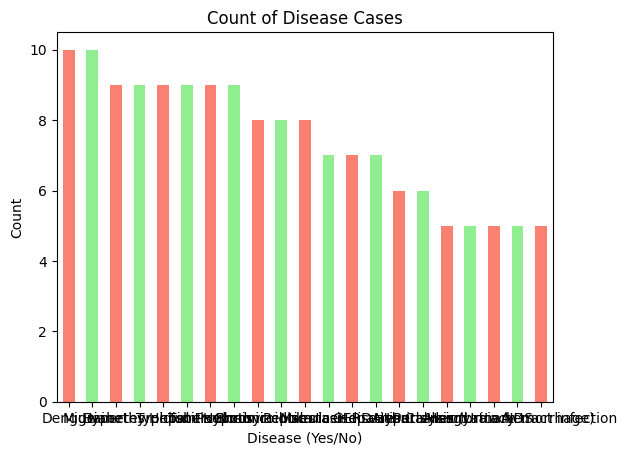

In [7]:
#visulize
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/kaggle/working/engineered_disease_dataset.csv")

# Histogram for numerical variables (e.g., Age)
plt.hist(df["Disease"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of disease")
plt.xlabel("disease")
plt.ylabel("Frequency")
plt.show()

# Bar chart for categorical variables (e.g., Disease)
df["Disease"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"])
plt.title("Count of Disease Cases")
plt.xlabel("Disease (Yes/No)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [48]:
#drop some rare diseases to increase accuracy
# Example code to drop rows
import pandas as pd

diseases_to_drop = {
    'Gastroenteritis', 'Osteoarthristis', 'Varicose veins', 'Impetigo',
    '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis D', 'Common Cold',
    'Dimorphic hemmorhoids(piles)', 'Hypoglycemia', 'Hepatitis E', 'hepatitis A',
    'Acne', 'Drug Reaction', 'Chicken pox', 'Cervical spondylosis', 'Jaundice',
    'Alcoholic hepatitis', 'Fungal infection', 'Psoriasis', 'Bronchial Asthma'
}

df = pd.read_csv("/kaggle/working/cleaned_data.csv")
df_filtered = df[~df['Disease'].isin(diseases_to_drop)]
df_filtered.to_csv("filtered_disease_dataset.csv", index=False)

In [54]:
df=pd.read_csv("/kaggle/working/filtered_disease_dataset.csv")
df = df.drop(columns=['Symptom_17'])
df_filtered.to_csv("filtered_disease_dataset.csv", index=False)

In [16]:
df = pd.read_csv("filtered_disease_dataset.csv")

columns_array = df.columns.tolist()
unique_symptoms=[]
for symptom in columns_array:
    if symptom!="Disease":
        unique_symptoms.append(set(df[symptom ]))
print(unique_symptoms)

[{' patches_in_throat', ' breathlessness', ' mood_swings', ' burning_micturition', ' weight_gain', ' chills', ' acidity', 'itching', ' stomach_pain', ' indigestion', ' muscle_wasting', ' headache', ' muscle_weakness', ' bladder_discomfort', ' yellowish_skin', ' continuous_sneezing', ' stiff_neck', ' fatigue', ' weight_loss', ' vomiting', ' chest_pain', ' shivering', ' skin_rash'}, {' patches_in_throat', ' lethargy', ' breathlessness', ' mood_swings', ' weight_gain', ' sweating', ' chills', ' acidity', ' nausea', ' restlessness', ' joint_pain', ' swelling_joints', ' ulcers_on_tongue', ' high_fever', ' cold_hands_and_feets', ' indigestion', ' weakness_of_one_body_side', ' loss_of_appetite', ' dizziness', ' cough', ' headache', ' bladder_discomfort', ' yellowish_skin', ' stiff_neck', ' weight_loss', ' fatigue', ' vomiting', ' chest_pain', ' shivering', ' foul_smell_of urine'}, {' continuous_feel_of_urine', ' lethargy', ' mood_swings', ' watering_from_eyes', ' sweating', ' blurred_and_dist

In [23]:
import pandas as pd
import csv

# Load the dataset
df = pd.read_csv("/kaggle/input/disease-symptom-description-dataset/dataset.csv")  # Update with your file path

# =============================================================================
# Define Symptom Categories (Only symptom names)
# =============================================================================

skin_cat = [
    'itching', 'skin_rash', 'red_spots_over_body',
    'yellowish_skin', 'blister'
]
gas_cat = [
    'vomiting', 'nausea', 'abdominal_pain', 'diarrhoea',
    'constipation', 'loss_of_appetite', 'acidity', 'indigestion',
    'passage_of_gases', 'belly_pain'
]
resp_cat = [
    'cough', 'breathlessness', 'chest_pain', 'phlegm',
    'rusty_sputum', 'blood_in_sputum', 'fast_heart_rate'
]
neurol_cat = [
    'headache', 'dizziness', 'loss_of_balance', 'blurred_and_distorted_vision',
    'altered_sensorium', 'lack_of_concentration', 'mood_swings', 'depression'
]
fever_cat = [
    'high_fever', 'chills', 'sweating', 'malaise', 'shivering', 'mild_fever'
]
musc_cat = [
    'joint_pain', 'muscle_weakness', 'muscle_pain',
    'stiff_neck', 'movement_stiffness', 'swelling_joints'
]
urin_cat = [
    'burning_micturition', 'bladder_discomfort',
    'continuous_feel_of_urine', 'foul_smell_of_urine'
]
mat_cat = [
    'weight_gain', 'weight_loss', 'obesity', 'excessive_hunger',
    'polyuria', 'irregular_sugar_level'
]
genera_cat = [
    'fatigue', 'lethargy', 'restlessness',
    'swelled_lymph_nodes', 'enlarged_thyroid'
]

# =============================================================================
# Define Headers Correctly
# =============================================================================
headers = [
    "Skin_Symptoms",
    "Gastrointestinal_Symptoms",
    "Respiratory_Symptoms",
    "Neurological_Symptoms",
    "Fever_Infection_Symptoms",
    "Musculoskeletal_Symptoms",
    "Urinary_Symptoms",
    "Metabolic_Endocrine",
    "General_Symptoms",
    "Disease"
]

# =============================================================================
# Process Each Row and Write to CSV
# =============================================================================
with open('killme2_dataframe.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)  # Write headers
    
    for index, row in df.iterrows():
        # Initialize all categories to 0
        data = [0] * (len(headers) - 1)  # Exclude 'Disease'
        disease = row['Disease']
        
        # Iterate through each symptom column (skip 'Disease')
        for symptom in row.index.drop('Disease'):
            # Check if the symptom is present (value == 1)
            if row[symptom] == 1:
                # Determine the category
                if symptom in skin_cat:
                    data[0] = 1
                elif symptom in gas_cat:
                    data[1] = 1
                elif symptom in resp_cat:
                    data[2] = 1
                elif symptom in neurol_cat:
                    data[3] = 1
                elif symptom in fever_cat:
                    data[4] = 1
                elif symptom in musc_cat:
                    data[5] = 1
                elif symptom in urin_cat:
                    data[6] = 1
                elif symptom in mat_cat:
                    data[7] = 1
                elif symptom in genera_cat:
                    data[8] = 1
        
        # Append the disease name and write the row
        data.append(disease)
        writer.writerow(data)

print("Processing complete. New dataset created.")

Processing complete. New dataset created.


Accuracy: 0.56
Precision: 0.61
Recall: 0.56
F3-score: 0.54

Classification Report:
                              precision    recall  f1-score   support

                        AIDS       0.00      0.00      0.00         1
                     Allergy       0.00      0.00      0.00         1
                   Arthritis       0.00      0.00      0.00         1
         Chronic cholestasis       1.00      1.00      1.00         2
                      Dengue       0.67      1.00      0.80         2
                   Diabetes        1.00      0.50      0.67         2
                        GERD       1.00      1.00      1.00         1
                Heart attack       0.00      0.00      0.00         1
                 Hepatitis B       1.00      0.50      0.67         2
                 Hepatitis C       0.00      0.00      0.00         1
               Hypertension        0.00      0.00      0.00         1
             Hyperthyroidism       0.50      1.00      0.67         2
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

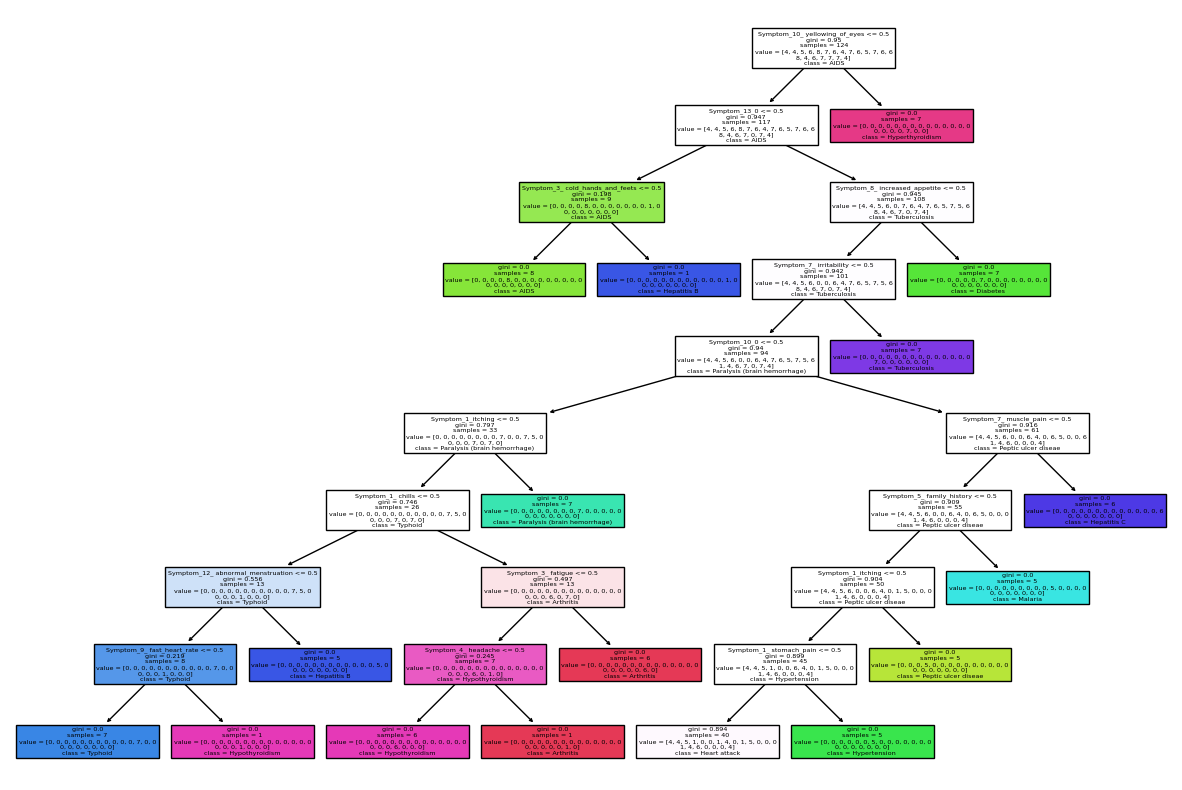

In [42]:
# Train the model with OneHotEncoding
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Load cleaned dataset
dataset = pd.read_csv("/kaggle/working/filtered_disease_dataset.csv")

# Define features and target
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 
                'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 
                'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 
                'Symptom_16', 'Symptom_17']  

# One-hot encode symptoms
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(dataset[symptom_cols])  # Use 'dataset' instead of 'df'

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(symptom_cols)
X = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Target variable
y = dataset["Disease"]  # Use 'dataset' here as well

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1,
    stratify=y  # Preserve class distribution
)

# Create Decision Tree classifier object
model = DecisionTreeClassifier(
    max_depth=9,
    random_state=1,
    min_samples_split=5  # Prevents overfitting
)

# Train Decision Tree Classifier
model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average='weighted')  # Changed from 'binary'
recall = recall_score(y_test, y_pred, average='weighted')       # Changed from 'binary'
f3 = fbeta_score(y_test, y_pred, beta=3, average='weighted')   # Fixed y_true to y_test

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F3-score: {f3:.2f}")

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize the decision tree with CORRECT feature names
plt.figure(figsize=(15,10))
tree.plot_tree(model, 
               feature_names=X.columns.tolist(),  # Use encoded feature names
               class_names=y.unique(), 
               filled=True)
plt.show()